In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt


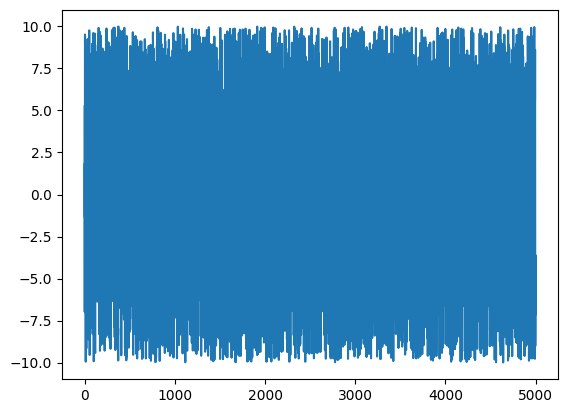

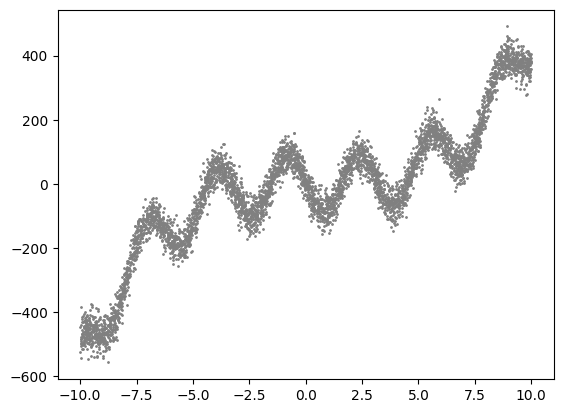

In [2]:
num_data = 5000

noise = init.normal_(torch.FloatTensor(num_data, 1), mean=0, std=30)
x = init.uniform_(torch.Tensor(num_data, 1), -10, 10)

def func(x) : return 0.5*(x**3) - 0.5*(x**2) - torch.sin(2*x) * 90 + 1
y_noise = func(x) + noise

plt.scatter(x, y_noise, s=1, c="gray")
plt.show()

In [3]:
model = nn.Sequential(
    nn.Linear(1,5),
    nn.LeakyReLU(0.2),
    nn.Linear(5, 10),
    nn.LeakyReLU(0.2),   
    nn.Linear(10,10),
    nn.LeakyReLU(0.2),
    nn.Linear(10,10),
    nn.LeakyReLU(0.2),    
    nn.Linear(10,5),
    nn.LeakyReLU(0.2),
    nn.Linear(5,1)    
)

In [4]:
gpu = torch.device('cuda')
loss_func = nn.L1Loss().to(gpu)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.002)

model = model.to(gpu)
x = x.to(gpu)
y_noise = y_noise.to(gpu)

num_epoch = 20000
loss_array = []

for epoch in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)

    loss = loss_func(output, y_noise)
    loss.backward()
    optimizer.step()

    loss_array.append(loss)

    if epoch % 100 == 0:
        print('epoch:', epoch, ' loss:', loss.item())
        

epoch: 0  loss: 151.028076171875
epoch: 100  loss: 131.25657653808594
epoch: 200  loss: 85.6181869506836
epoch: 300  loss: 82.49935150146484
epoch: 400  loss: 77.45793914794922
epoch: 500  loss: 70.05541229248047
epoch: 600  loss: 65.48503875732422
epoch: 700  loss: 58.55077362060547
epoch: 800  loss: 58.134117126464844
epoch: 900  loss: 58.00796890258789
epoch: 1000  loss: 57.95362854003906
epoch: 1100  loss: 57.920230865478516
epoch: 1200  loss: 57.89847183227539
epoch: 1300  loss: 57.8821907043457
epoch: 1400  loss: 57.86506271362305
epoch: 1500  loss: 57.84718704223633
epoch: 1600  loss: 57.83529281616211
epoch: 1700  loss: 57.82311248779297
epoch: 1800  loss: 57.81015396118164
epoch: 1900  loss: 57.797271728515625
epoch: 2000  loss: 57.78148651123047
epoch: 2100  loss: 57.76438522338867
epoch: 2200  loss: 57.7453727722168
epoch: 2300  loss: 57.72166061401367
epoch: 2400  loss: 57.69379806518555
epoch: 2500  loss: 57.66011047363281
epoch: 2600  loss: 57.616512298583984
epoch: 2700 

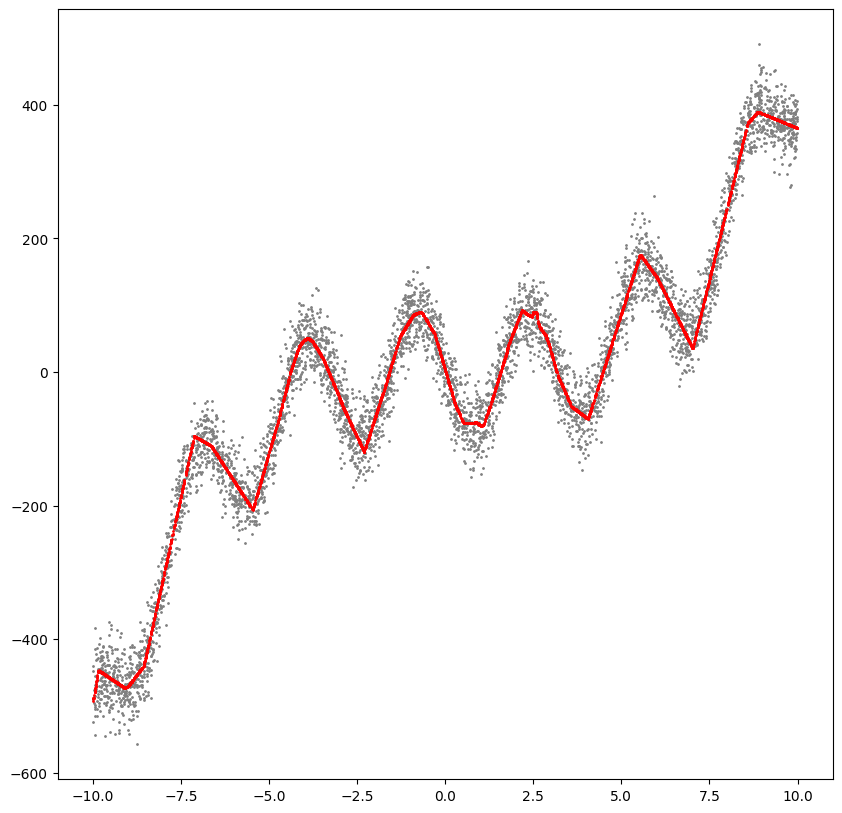

In [5]:
#plt.plot(loss_array)
#plt.show()

plt.figure(figsize=(10,10))

x = x.cpu().detach().numpy()
y_noise = y_noise.cpu().detach().numpy()
output = output.cpu().detach().numpy()

plt.scatter(x, y_noise, s=1, c="gray")
plt.scatter(x, output, s=1, c="red")

plt.show()
